# Graphlet Analysis

Remember, in notebook *Thresholding*, I thresholded contact maps and save them
in a way that orca can read them.

In this notebook, I perform two actions:
1. I separate orbits extracted from each cell lines and put them together.
in such way, orbit 0 of the cells will be in a file, orbits 1 will be i.
in such way, separate file and so forth until the 72nd orbit.

2. I then run mine.jar on the files to extract the pairwise MIC values. As a result of this
step, I will have pairwise MIC comparison between all cell lines for all orbitals of a 
certain chromosome.

By repeating steps 1 and 2 for all 23 chromosomes, I will have pairwise MIC values for all
orbitals of all cell lines. I woulb eventually be able to have a data array of shape
``` A(23 * 73) ```, where the rows correspond to the chromosomes and columns correspond
to orbits.


In [1]:
import numpy as np
import cv2
from utility import *
import matplotlib.pyplot as plt
from iced import normalization
from iced import filter
import os
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/watson/scripts/virt/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
cells = ['mit', 'all', 'rl', 'call4']
graphlets = [ None ] * 24
for chr1 in range(1, 24):
    graphlets[chr1] = {}
    for cell in cells:
       graphlets[chr1][cell] = readMat\
    ("data/chr%02d_chr%02d_%s.graphlets"%(chr1, chr1, cell), delimiter=" ").astype('uint32') 
    
hics = {}
for cell1 in cells:
    hics[cell1] = {}
    for cell2 in cells:
        if cell1 == cell2:
            continue
        hics[cell1][cell2] = np.zeros((24, 73))
        #cell (i, j) will store correlation between orbital j in 
        #ith chromosome
for chr1 in range(1, 24):
    for orbit in range(73):
        var1, var2, mic = get_mic_from_file\
            ("data/chr%02d_orbit%02d.paired.csv,allpairs,cv=0.0,B=n^0.6,Results.csv"\
             %(chr1, orbit))
        for i in range(len(var1)):
                hics[var1[i]][var2[i]][chr1, orbit] = mic[i]
                hics[var2[i]][var1[i]][chr1, orbit] = mic[i]

file directory: data/chr01_chr01_mit.graphlets
file directory: data/chr01_chr01_all.graphlets
file directory: data/chr01_chr01_rl.graphlets
file directory: data/chr01_chr01_call4.graphlets
file directory: data/chr02_chr02_mit.graphlets
file directory: data/chr02_chr02_all.graphlets
file directory: data/chr02_chr02_rl.graphlets
file directory: data/chr02_chr02_call4.graphlets
file directory: data/chr03_chr03_mit.graphlets
file directory: data/chr03_chr03_all.graphlets
file directory: data/chr03_chr03_rl.graphlets
file directory: data/chr03_chr03_call4.graphlets
file directory: data/chr04_chr04_mit.graphlets
file directory: data/chr04_chr04_all.graphlets
file directory: data/chr04_chr04_rl.graphlets
file directory: data/chr04_chr04_call4.graphlets
file directory: data/chr05_chr05_mit.graphlets
file directory: data/chr05_chr05_all.graphlets
file directory: data/chr05_chr05_rl.graphlets
file directory: data/chr05_chr05_call4.graphlets
file directory: data/chr06_chr06_mit.graphlets
file dir

In [8]:
print(hics)

{'rl': {'call4': array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.17611, 0.20608, 0.21641, ..., 0.19296, 0.2324 , 0.17572],
       [0.18984, 0.25965, 0.25687, ..., 0.2039 , 0.21839, 0.15438],
       ...,
       [0.28777, 0.27727, 0.28562, ..., 0.     , 0.     , 0.     ],
       [0.31244, 0.31671, 0.36781, ..., 0.00864, 0.06558, 0.     ],
       [0.22169, 0.2897 , 0.28588, ..., 0.21696, 0.2313 , 0.21876]]), 'all': array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.12475, 0.17961, 0.18326, ..., 0.18756, 0.19133, 0.14995],
       [0.10694, 0.1547 , 0.17306, ..., 0.16635, 0.17002, 0.13637],
       ...,
       [0.13567, 0.29628, 0.33785, ..., 0.     , 0.     , 0.     ],
       [0.19393, 0.21032, 0.27111, ..., 0.0119 , 0.01187, 0.     ],
       [0.13128, 0.17798, 0.22187, ..., 0.19954, 0.19465, 0.19249]]), 'mit': array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.0945 , 0.15282, 0.16284, ..., 0.19104, 0.19046,

The following R-script reads graphlet files corresponding the a chromosome which
are located under ```data/*.edges```. It then writes the resulting orbits into
```data/*.graphlets```.

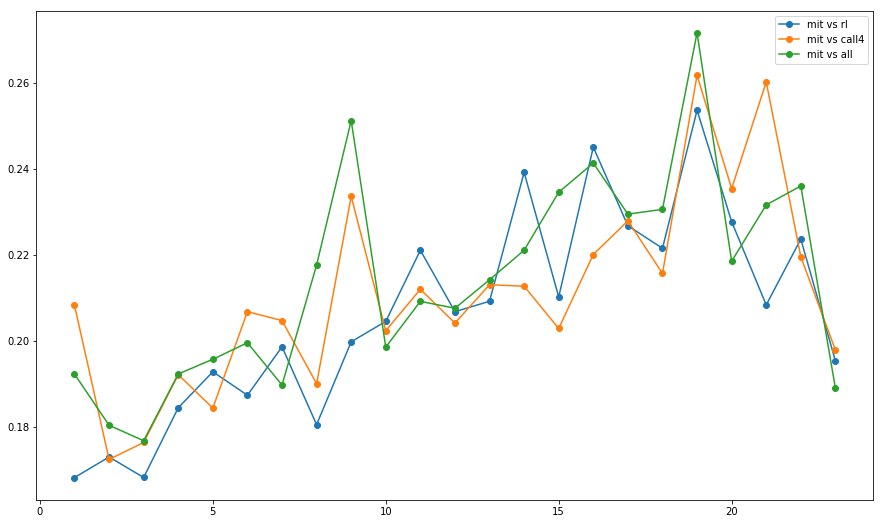

In [9]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(1, 24)
ax = plt.subplot(1, 1, 1)
for cell in hics['mit']:
    y = np.mean(hics['mit'][cell][1:,:], axis=1)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
plt.legend()
plt.show()

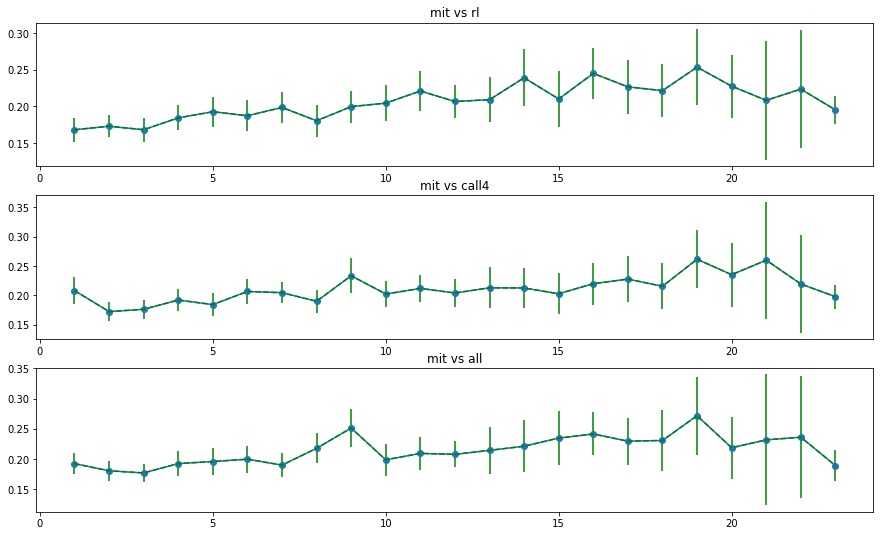

In [11]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(1, 24)
count = 1
for cell in hics['mit']:
    ax = plt.subplot(3, 1, count)
    count += 1
    y = np.mean(hics['mit'][cell][1:,:], axis=1)
    y_error = np.std(hics['mit'][cell][1:,:], axis=1)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
    ax.errorbar(x, y, yerr=y_error, linestyle="dashed", marker="None", color="green")
    ax.set_title("mit vs %s"%cell)
plt.show()

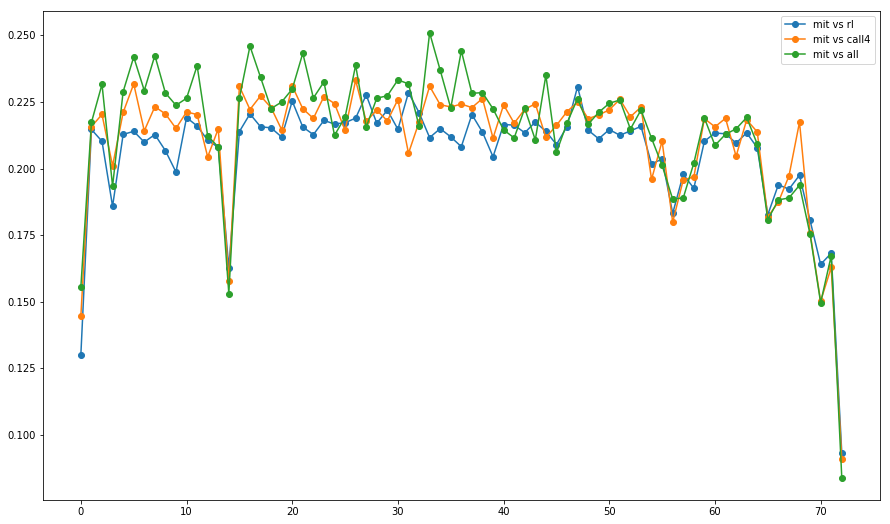

In [12]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(73)
ax = plt.subplot(1, 1, 1)
for cell in hics['mit']:
    y = np.mean(hics['mit'][cell][1:,:], axis=0)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
plt.legend()
plt.show()

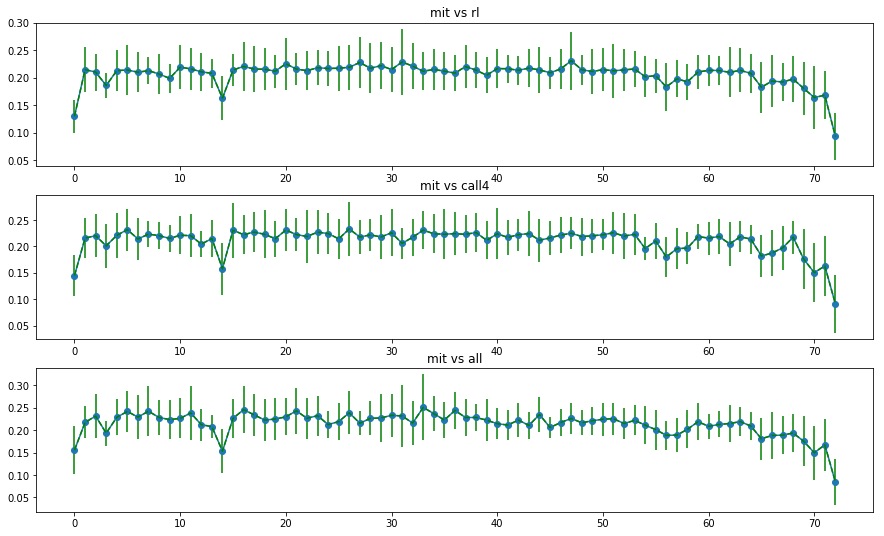

In [14]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(0, 73)
count = 1
for cell in hics['mit']:
    ax = plt.subplot(3, 1, count)
    count += 1
    y = np.mean(hics['mit'][cell][1:,:], axis=0)
    y_error = np.std(hics['mit'][cell][1:,:], axis=0)
    ax.plot(x, y, marker="o", label="mit vs %s"%cell)
    ax.errorbar(x, y, yerr=y_error, linestyle="dashed", marker="None", color="green")
    ax.set_title("mit vs %s"%cell)
plt.show()

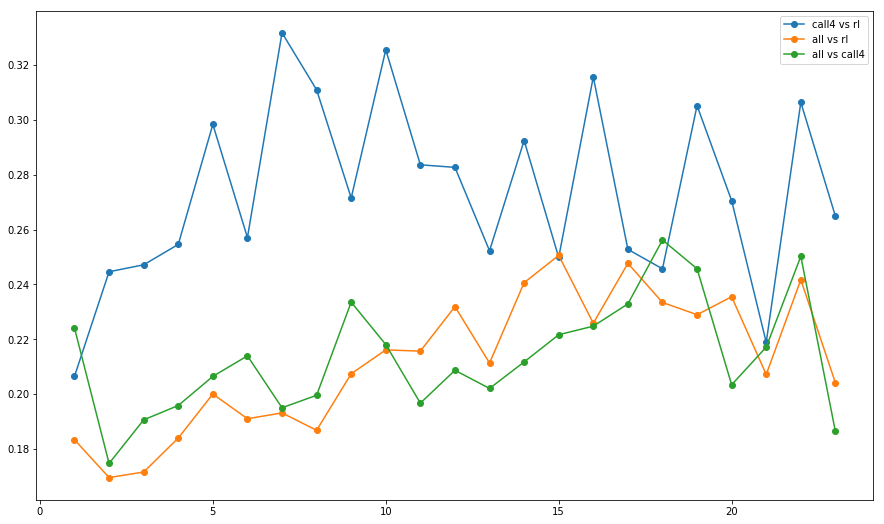

In [15]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(1, 24)
ax = plt.subplot(1, 1, 1)
for cell1 in hics:
    if cell1 == 'mit':
        continue
    for cell2 in hics[cell1]:
        if cell2 == 'mit' or cell1 > cell2:
            continue
        y = np.mean(hics[cell1][cell2][1:,:], axis=1)
        ax.plot(x, y, marker="o", label="%s vs %s"%(cell1, cell2))
plt.legend()
plt.show()

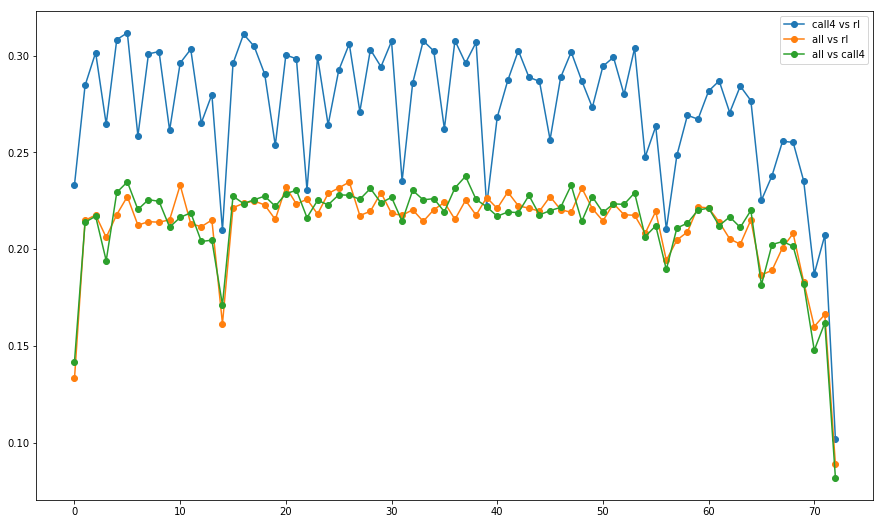

In [16]:
pylab.rcParams['figure.figsize'] = (15, 9)
x = range(0, 73)
ax = plt.subplot(1, 1, 1)
for cell1 in hics:
    if cell1 == 'mit':
        continue
    for cell2 in hics[cell1]:
        if cell2 == 'mit' or cell1 > cell2:
            continue
        y = np.mean(hics[cell1][cell2][1:,:], axis=0)
        ax.plot(x, y, marker="o", label="%s vs %s"%(cell1, cell2))
plt.legend()
plt.show()